In [2]:
import glob
import os
import pandas as pd

import seaborn as sns
import numpy as np
pd.options.display.max_colwidth = 500

In [3]:
search_directory = '/Users/olgabot/botryllus-data/data/botryllus-proteins/sourmash_search_scale5'

csvs = glob.glob(os.path.join(search_directory, '*.csv'))

dfs = []
for csv in csvs:
    df = pd.read_csv(csv)
    dfs.append(df)
bhf_pfam = pd.concat(dfs, ignore_index=True)
bhf_pfam = bhf_pfam.sort_values('similarity', ascending=False)
print(bhf_pfam.shape)
bhf_pfam.head()

(11599, 7)


,similarity,name,filename,md5,query_filename,query_name,query_md5
4062,0.141192,A0A1Y2CQP8_9FUNG/32-76 A0A1Y2CQP8.1 PF00187.22;Chitin_bind_1;,NaN,07b63a911e2013a459db28346afe7128,bhf_isoforms.fa,BHF_isoform2,6ca89ced
5619,0.132994,A0A5N5NYA3_PANHP/704-740 A0A5N5NYA3.1 PF00057.21;Ldl_recept_a;,NaN,cda3f54ec36faa7a209869131e38d7aa,bhf_isoforms.fa,BHF_isoform2,6ca89ced
5478,0.132994,A0A1G9J3N3_9FIRM/33-92 A0A1G9J3N3.1 PF01047.25;MarR;,NaN,de21be4ccbdc05740f9c271492b083ce,bhf_isoforms.fa,BHF_isoform2,6ca89ced
5477,0.132994,A0A345ZYJ1_9RHIZ/52-108 A0A345ZYJ1.1 PF01047.25;MarR;,NaN,6e631dd43fe1b7da1148ec591c8e5f01,bhf_isoforms.fa,BHF_isoform2,6ca89ced
2781,0.132994,A0A1E3NGZ3_9ASCO/34-72 A0A1E3NGZ3.1 PF00172.21;Zn_clus;,NaN,334785b107fcc3222edc5998f3c804d6,bhf_isoforms.fa,BHF_isoform2,6ca89ced


In [53]:
bhf_pfam.loc[bhf_pfam.filename.notnull()]

,similarity,name,filename,md5,query_filename,query_name,query_md5


/Users/olgabot/opt/miniconda3/envs/botryllus/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='similarity', ylabel='Density'>

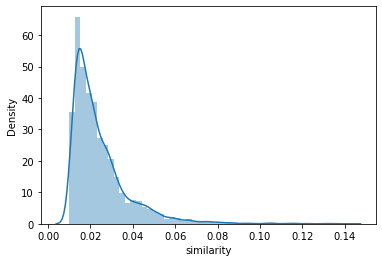

In [54]:
sns.distplot(bhf_pfam.similarity)

/Users/olgabot/opt/miniconda3/envs/botryllus/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/olgabot/opt/miniconda3/envs/botryllus/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


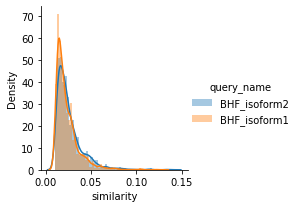

In [55]:
g = sns.FacetGrid(bhf_pfam, hue='query_name')
g.map(sns.distplot, 'similarity')
g.add_legend()

In [60]:
bhf_pfam_metadata_split1 = bhf_pfam.name.str.rstrip(';').str.split(';', expand=True)
bhf_pfam_metadata_split2 = bhf_pfam_metadata_split1[0].str.split(expand=True)


pfam_name = bhf_pfam_metadata_split1[1]
pfam_name.name = 'pfam_name'
bhf_pfam_metadata = pd.concat([pfam_name, bhf_pfam_metadata_split2], axis=1)
bhf_pfam_metadata = bhf_pfam_metadata.rename(columns={2: 'pfam_id_full'})
bhf_pfam_metadata['pfam_id'] = bhf_pfam_metadata.pfam_id_full.str.split('.').str[0]
bhf_pfam_metadata.head()

,pfam_name,0,1,pfam_id_full,pfam_id
4062,Chitin_bind_1,A0A1Y2CQP8_9FUNG/32-76,A0A1Y2CQP8.1,PF00187.22,PF00187
5619,Ldl_recept_a,A0A5N5NYA3_PANHP/704-740,A0A5N5NYA3.1,PF00057.21,PF00057
5478,MarR,A0A1G9J3N3_9FIRM/33-92,A0A1G9J3N3.1,PF01047.25,PF01047
5477,MarR,A0A345ZYJ1_9RHIZ/52-108,A0A345ZYJ1.1,PF01047.25,PF01047
2781,Zn_clus,A0A1E3NGZ3_9ASCO/34-72,A0A1E3NGZ3.1,PF00172.21,PF00172


In [61]:
bhf_pfam_with_metadata = pd.concat([bhf_pfam, bhf_pfam_metadata], axis=1)
first_cols = ['pfam_name', 'similarity', 'query_name']
columns_reordered = first_cols + bhf_pfam_with_metadata.columns.difference(first_cols).tolist()
bhf_pfam_with_metadata = bhf_pfam_with_metadata[columns_reordered]
bhf_pfam_with_metadata.head()

,pfam_name,similarity,query_name,0,1,filename,md5,name,pfam_id,pfam_id_full,query_filename,query_md5
4062,Chitin_bind_1,0.141192,BHF_isoform2,A0A1Y2CQP8_9FUNG/32-76,A0A1Y2CQP8.1,NaN,07b63a911e2013a459db28346afe7128,A0A1Y2CQP8_9FUNG/32-76 A0A1Y2CQP8.1 PF00187.22;Chitin_bind_1;,PF00187,PF00187.22,bhf_isoforms.fa,6ca89ced
5619,Ldl_recept_a,0.132994,BHF_isoform2,A0A5N5NYA3_PANHP/704-740,A0A5N5NYA3.1,NaN,cda3f54ec36faa7a209869131e38d7aa,A0A5N5NYA3_PANHP/704-740 A0A5N5NYA3.1 PF00057.21;Ldl_recept_a;,PF00057,PF00057.21,bhf_isoforms.fa,6ca89ced
5478,MarR,0.132994,BHF_isoform2,A0A1G9J3N3_9FIRM/33-92,A0A1G9J3N3.1,NaN,de21be4ccbdc05740f9c271492b083ce,A0A1G9J3N3_9FIRM/33-92 A0A1G9J3N3.1 PF01047.25;MarR;,PF01047,PF01047.25,bhf_isoforms.fa,6ca89ced
5477,MarR,0.132994,BHF_isoform2,A0A345ZYJ1_9RHIZ/52-108,A0A345ZYJ1.1,NaN,6e631dd43fe1b7da1148ec591c8e5f01,A0A345ZYJ1_9RHIZ/52-108 A0A345ZYJ1.1 PF01047.25;MarR;,PF01047,PF01047.25,bhf_isoforms.fa,6ca89ced
2781,Zn_clus,0.132994,BHF_isoform2,A0A1E3NGZ3_9ASCO/34-72,A0A1E3NGZ3.1,NaN,334785b107fcc3222edc5998f3c804d6,A0A1E3NGZ3_9ASCO/34-72 A0A1E3NGZ3.1 PF00172.21;Zn_clus;,PF00172,PF00172.21,bhf_isoforms.fa,6ca89ced


In [62]:
bhf_pfam_with_metadata.query('similarity > 0.08')

,pfam_name,similarity,query_name,0,1,filename,md5,name,pfam_id,pfam_id_full,query_filename,query_md5
4062,Chitin_bind_1,0.141192,BHF_isoform2,A0A1Y2CQP8_9FUNG/32-76,A0A1Y2CQP8.1,NaN,07b63a911e2013a459db28346afe7128,A0A1Y2CQP8_9FUNG/32-76 A0A1Y2CQP8.1 PF00187.22;Chitin_bind_1;,PF00187,PF00187.22,bhf_isoforms.fa,6ca89ced
5619,Ldl_recept_a,0.132994,BHF_isoform2,A0A5N5NYA3_PANHP/704-740,A0A5N5NYA3.1,NaN,cda3f54ec36faa7a209869131e38d7aa,A0A5N5NYA3_PANHP/704-740 A0A5N5NYA3.1 PF00057.21;Ldl_recept_a;,PF00057,PF00057.21,bhf_isoforms.fa,6ca89ced
5478,MarR,0.132994,BHF_isoform2,A0A1G9J3N3_9FIRM/33-92,A0A1G9J3N3.1,NaN,de21be4ccbdc05740f9c271492b083ce,A0A1G9J3N3_9FIRM/33-92 A0A1G9J3N3.1 PF01047.25;MarR;,PF01047,PF01047.25,bhf_isoforms.fa,6ca89ced
5477,MarR,0.132994,BHF_isoform2,A0A345ZYJ1_9RHIZ/52-108,A0A345ZYJ1.1,NaN,6e631dd43fe1b7da1148ec591c8e5f01,A0A345ZYJ1_9RHIZ/52-108 A0A345ZYJ1.1 PF01047.25;MarR;,PF01047,PF01047.25,bhf_isoforms.fa,6ca89ced
2781,Zn_clus,0.132994,BHF_isoform2,A0A1E3NGZ3_9ASCO/34-72,A0A1E3NGZ3.1,NaN,334785b107fcc3222edc5998f3c804d6,A0A1E3NGZ3_9ASCO/34-72 A0A1E3NGZ3.1 PF00172.21;Zn_clus;,PF00172,PF00172.21,bhf_isoforms.fa,6ca89ced
...,...,...,...,...,...,...,...,...,...,...,...,...
4368,KH_1,0.081070,BHF_isoform2,A0A3Q3VUQ5_MOLML/62-98,A0A3Q3VUQ5.1,NaN,79708da801d4dceacc8b99f6f63b6c41,A0A3Q3VUQ5_MOLML/62-98 A0A3Q3VUQ5.1 PF00013.32;KH_1;,PF00013,PF00013.32,bhf_isoforms.fa,6ca89ced
4598,RHS_repeat,0.081070,BHF_isoform2,A7BYM7_9GAMM/55-91,A7BYM7.1,NaN,63a5863b7a1a1bb770c359b5bc37d578,A7BYM7_9GAMM/55-91 A7BYM7.1 PF05593.17;RHS_repeat;,PF05593,PF05593.17,bhf_isoforms.fa,6ca89ced
4369,KRE1,0.081070,BHF_isoform2,A0A421J7W7_9ASCO/22-89,A0A421J7W7.1,NaN,94eb3cc5cbd12c865458e7b57e5a62f9,A0A421J7W7_9ASCO/22-89 A0A421J7W7.1 PF17056.8;KRE1;,PF17056,PF17056.8,bhf_isoforms.fa,6ca89ced
3920,CBM_1,0.081070,BHF_isoform2,A0A6G0XDQ6_9STRA/342-370,A0A6G0XDQ6.1,NaN,6c7f9d68588553d5ba2ff5bc8d41c5ff,A0A6G0XDQ6_9STRA/342-370 A0A6G0XDQ6.1 PF00734.21;CBM_1;,PF00734,PF00734.21,bhf_isoforms.fa,6ca89ced


## Get PFAM to Gene ontology mapping

In [63]:
pfam2go_original = pd.read_csv('http://current.geneontology.org/ontology/external2go/pfam2go', skiprows=6, sep=' > ', header=None)
pfam2go_original.head()

/Users/olgabot/opt/miniconda3/envs/botryllus/lib/python3.10/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,0,1
0,Pfam:PF00001 7tm_1,GO:G protein-coupled receptor activity ; GO:0004930
1,Pfam:PF00001 7tm_1,GO:G protein-coupled receptor signaling pathway ; GO:0007186
2,Pfam:PF00001 7tm_1,GO:integral component of membrane ; GO:0016021
3,Pfam:PF00002 7tm_2,GO:G protein-coupled receptor activity ; GO:0004930
4,Pfam:PF00002 7tm_2,GO:G protein-coupled receptor signaling pathway ; GO:0007186


In [64]:
pfam_id_to_name = pfam2go_original[0].str.split(expand=True)
pfam_id_to_name[0] = pfam_id_to_name[0].str.split(':').str[1]
pfam_id_to_name = pfam_id_to_name.rename(columns={0:'pfam_id', 1: 'pfam_name'})
pfam_id_to_name.head()

,pfam_id,pfam_name
0,PF00001,7tm_1
1,PF00001,7tm_1
2,PF00001,7tm_1
3,PF00002,7tm_2
4,PF00002,7tm_2


In [65]:
go_name_to_id = pfam2go_original[1].str.split(' ; ', expand=True)
go_name_to_id = go_name_to_id.rename(columns={0: 'go_term', 1: 'go_id'})
go_name_to_id.head()

,go_term,go_id
0,GO:G protein-coupled receptor activity,GO:0004930
1,GO:G protein-coupled receptor signaling pathway,GO:0007186
2,GO:integral component of membrane,GO:0016021
3,GO:G protein-coupled receptor activity,GO:0004930
4,GO:G protein-coupled receptor signaling pathway,GO:0007186


In [66]:
pfam2go_cleaned = pd.concat([pfam_id_to_name, go_name_to_id], axis=1)
pfam2go_cleaned.head()

,pfam_id,pfam_name,go_term,go_id
0,PF00001,7tm_1,GO:G protein-coupled receptor activity,GO:0004930
1,PF00001,7tm_1,GO:G protein-coupled receptor signaling pathway,GO:0007186
2,PF00001,7tm_1,GO:integral component of membrane,GO:0016021
3,PF00002,7tm_2,GO:G protein-coupled receptor activity,GO:0004930
4,PF00002,7tm_2,GO:G protein-coupled receptor signaling pathway,GO:0007186


## Join BHF search with pfam2go

In [69]:

bhf_pfam_pfam2go = bhf_pfam_with_metadata.merge(pfam2go_cleaned, on=['pfam_id', 'pfam_name'])

# Reorder columns to put go term in first few
first_cols = ['similarity', 'query_name', 'pfam_name', 'go_term']
cols = first_cols + bhf_pfam_pfam2go.columns.difference(first_cols).tolist()
bhf_pfam_pfam2go = bhf_pfam_pfam2go[cols]
print(bhf_pfam_pfam2go.shape)
bhf_pfam_pfam2go.head()

(13651, 14)


,similarity,query_name,pfam_name,go_term,0,1,filename,go_id,md5,name,pfam_id,pfam_id_full,query_filename,query_md5
0,0.141192,BHF_isoform2,Chitin_bind_1,GO:chitin binding,A0A1Y2CQP8_9FUNG/32-76,A0A1Y2CQP8.1,NaN,GO:0008061,07b63a911e2013a459db28346afe7128,A0A1Y2CQP8_9FUNG/32-76 A0A1Y2CQP8.1 PF00187.22;Chitin_bind_1;,PF00187,PF00187.22,bhf_isoforms.fa,6ca89ced
1,0.129064,BHF_isoform1,Chitin_bind_1,GO:chitin binding,A0A1Y2CQP8_9FUNG/32-76,A0A1Y2CQP8.1,NaN,GO:0008061,07b63a911e2013a459db28346afe7128,A0A1Y2CQP8_9FUNG/32-76 A0A1Y2CQP8.1 PF00187.22;Chitin_bind_1;,PF00187,PF00187.22,bhf_isoforms.fa,cffe047d
2,0.132994,BHF_isoform2,Ldl_recept_a,GO:protein binding,A0A5N5NYA3_PANHP/704-740,A0A5N5NYA3.1,NaN,GO:0005515,cda3f54ec36faa7a209869131e38d7aa,A0A5N5NYA3_PANHP/704-740 A0A5N5NYA3.1 PF00057.21;Ldl_recept_a;,PF00057,PF00057.21,bhf_isoforms.fa,6ca89ced
3,0.121588,BHF_isoform1,Ldl_recept_a,GO:protein binding,A0A5N5NYA3_PANHP/704-740,A0A5N5NYA3.1,NaN,GO:0005515,cda3f54ec36faa7a209869131e38d7aa,A0A5N5NYA3_PANHP/704-740 A0A5N5NYA3.1 PF00057.21;Ldl_recept_a;,PF00057,PF00057.21,bhf_isoforms.fa,cffe047d
4,0.051190,BHF_isoform2,Ldl_recept_a,GO:protein binding,A0A0P7V7D9_SCLFO/904-939,A0A0P7V7D9.1,NaN,GO:0005515,78a95aa23b2a2f0656063799d55e988b,A0A0P7V7D9_SCLFO/904-939 A0A0P7V7D9.1 PF00057.21;Ldl_recept_a;,PF00057,PF00057.21,bhf_isoforms.fa,6ca89ced


In [71]:
bhf_pfam_pfam2go_top = bhf_pfam_pfam2go.query('similarity > 0.08')
print(bhf_pfam_pfam2go_top.shape)

(116, 14)


In [145]:
bhf_pfam_pfam2go_top.groupby(['query_name', 'pfam_name']).size().sort_values(ascending=False)

query_name    pfam_name     
BHF_isoform2  Zn_clus           18
BHF_isoform1  Zn_clus           15
BHF_isoform2  MarR              14
BHF_isoform1  MarR              10
BHF_isoform2  zf-C4              8
              Ribosomal_L31      6
              RF-1               6
BHF_isoform1  zf-C4              4
BHF_isoform2  rve                3
BHF_isoform1  Ribosomal_L29e     3
BHF_isoform2  Ribosomal_L29e     3
              CBM_1              3
              Keratin_B2_2       2
              TSP_3              2
BHF_isoform1  CheW               2
              RF-1               2
              Fer2               2
BHF_isoform2  HLH                2
              KH_1               1
              KRE1               1
BHF_isoform1  Chitin_bind_1      1
BHF_isoform2  Ldl_recept_a       1
              GTP_EFTU_D2        1
              PRD                1
              Chitin_bind_1      1
BHF_isoform1  WD40               1
              Ldl_recept_a       1
BHF_isoform2  WD40        

In [144]:
bhf_pfam_pfam2go_top.groupby(['query_name', 'go_term']).size().sort_values(ascending=False)

query_name    go_term                                                                 
BHF_isoform2  GO:regulation of transcription, DNA-templated                               16
BHF_isoform1  GO:regulation of transcription, DNA-templated                               11
BHF_isoform2  GO:DNA-binding transcription factor activity                                 9
              GO:zinc ion binding                                                          8
              GO:DNA-binding transcription factor activity, RNA polymerase II-specific     6
BHF_isoform1  GO:zinc ion binding                                                          6
              GO:DNA-binding transcription factor activity                                 6
              GO:DNA-binding transcription factor activity, RNA polymerase II-specific     5
BHF_isoform2  GO:translational termination                                                 3
              GO:translation release factor activity                        

/Users/olgabot/opt/miniconda3/envs/botryllus/lib/python3.10/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


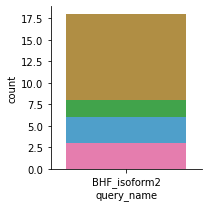

In [81]:
g = sns.FacetGrid(bhf_pfam_pfam2go_top, hue='pfam_name')
g.map(sns.countplot, 'query_name')

# E-value calculation

## BHF isoform number of k-mers

These are HP k-mers of length 24

In [85]:
isoform_kmers = {'BHF_isoform1': 229, 'BHF_isoform2': 196}

In [87]:
bhf_pfam_pfam2go['query_kmers'] = bhf_pfam_pfam2go.query_name.map(isoform_kmers)
bhf_pfam_pfam2go.head()

,similarity,query_name,pfam_name,go_term,0,1,filename,go_id,md5,name,pfam_id,pfam_id_full,query_filename,query_md5,query_kmers
0,0.141192,BHF_isoform2,Chitin_bind_1,GO:chitin binding,A0A1Y2CQP8_9FUNG/32-76,A0A1Y2CQP8.1,NaN,GO:0008061,07b63a911e2013a459db28346afe7128,A0A1Y2CQP8_9FUNG/32-76 A0A1Y2CQP8.1 PF00187.22;Chitin_bind_1;,PF00187,PF00187.22,bhf_isoforms.fa,6ca89ced,196
1,0.129064,BHF_isoform1,Chitin_bind_1,GO:chitin binding,A0A1Y2CQP8_9FUNG/32-76,A0A1Y2CQP8.1,NaN,GO:0008061,07b63a911e2013a459db28346afe7128,A0A1Y2CQP8_9FUNG/32-76 A0A1Y2CQP8.1 PF00187.22;Chitin_bind_1;,PF00187,PF00187.22,bhf_isoforms.fa,cffe047d,229
2,0.132994,BHF_isoform2,Ldl_recept_a,GO:protein binding,A0A5N5NYA3_PANHP/704-740,A0A5N5NYA3.1,NaN,GO:0005515,cda3f54ec36faa7a209869131e38d7aa,A0A5N5NYA3_PANHP/704-740 A0A5N5NYA3.1 PF00057.21;Ldl_recept_a;,PF00057,PF00057.21,bhf_isoforms.fa,6ca89ced,196
3,0.121588,BHF_isoform1,Ldl_recept_a,GO:protein binding,A0A5N5NYA3_PANHP/704-740,A0A5N5NYA3.1,NaN,GO:0005515,cda3f54ec36faa7a209869131e38d7aa,A0A5N5NYA3_PANHP/704-740 A0A5N5NYA3.1 PF00057.21;Ldl_recept_a;,PF00057,PF00057.21,bhf_isoforms.fa,cffe047d,229
4,0.051190,BHF_isoform2,Ldl_recept_a,GO:protein binding,A0A0P7V7D9_SCLFO/904-939,A0A0P7V7D9.1,NaN,GO:0005515,78a95aa23b2a2f0656063799d55e988b,A0A0P7V7D9_SCLFO/904-939 A0A0P7V7D9.1 PF00057.21;Ldl_recept_a;,PF00057,PF00057.21,bhf_isoforms.fa,6ca89ced,196


In [146]:
pfam_database_kmers = 18951695

In [147]:
bhf_pfam_pfam2go['e_value'] = (bhf_pfam_pfam2go.query_kmers/pfam_database_kmers)/bhf_pfam_pfam2go.similarity

first_cols = ['e_value', 'similarity', 'query_name', 'pfam_name', 'go_term']

cols = first_cols + bhf_pfam_pfam2go.columns.difference(first_cols).tolist()
bhf_pfam_pfam2go = bhf_pfam_pfam2go[cols]
bhf_pfam_pfam2go = bhf_pfam_pfam2go.sort_values('e_value')
bhf_pfam_pfam2go['e_value_neg_log10'] = -np.log10(bhf_pfam_pfam2go.e_value)
bhf_pfam_pfam2go.head()

,e_value,similarity,query_name,pfam_name,go_term,0,1,e_value_neg_log10,filename,go_id,md5,name,pfam_id,pfam_id_full,query_filename,query_kmers,query_md5
0,0.000073,0.141192,BHF_isoform2,Chitin_bind_1,GO:chitin binding,A0A1Y2CQP8_9FUNG/32-76,A0A1Y2CQP8.1,4.135203,NaN,GO:0008061,07b63a911e2013a459db28346afe7128,A0A1Y2CQP8_9FUNG/32-76 A0A1Y2CQP8.1 PF00187.22;Chitin_bind_1;,PF00187,PF00187.22,bhf_isoforms.fa,196,6ca89ced
335,0.000078,0.132994,BHF_isoform2,Zn_clus,GO:zinc ion binding,A0A1E3NGZ3_9ASCO/34-72,A0A1E3NGZ3.1,4.109224,NaN,GO:0008270,334785b107fcc3222edc5998f3c804d6,A0A1E3NGZ3_9ASCO/34-72 A0A1E3NGZ3.1 PF00172.21;Zn_clus;,PF00172,PF00172.21,bhf_isoforms.fa,196,6ca89ced
9,0.000078,0.132994,BHF_isoform2,MarR,"GO:regulation of transcription, DNA-templated",A0A345ZYJ1_9RHIZ/52-108,A0A345ZYJ1.1,4.109224,NaN,GO:0006355,6e631dd43fe1b7da1148ec591c8e5f01,A0A345ZYJ1_9RHIZ/52-108 A0A345ZYJ1.1 PF01047.25;MarR;,PF01047,PF01047.25,bhf_isoforms.fa,196,6ca89ced
7,0.000078,0.132994,BHF_isoform2,MarR,"GO:regulation of transcription, DNA-templated",A0A1G9J3N3_9FIRM/33-92,A0A1G9J3N3.1,4.109224,NaN,GO:0006355,de21be4ccbdc05740f9c271492b083ce,A0A1G9J3N3_9FIRM/33-92 A0A1G9J3N3.1 PF01047.25;MarR;,PF01047,PF01047.25,bhf_isoforms.fa,196,6ca89ced
6,0.000078,0.132994,BHF_isoform2,MarR,GO:DNA-binding transcription factor activity,A0A1G9J3N3_9FIRM/33-92,A0A1G9J3N3.1,4.109224,NaN,GO:0003700,de21be4ccbdc05740f9c271492b083ce,A0A1G9J3N3_9FIRM/33-92 A0A1G9J3N3.1 PF01047.25;MarR;,PF01047,PF01047.25,bhf_isoforms.fa,196,6ca89ced


/Users/olgabot/opt/miniconda3/envs/botryllus/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/olgabot/opt/miniconda3/envs/botryllus/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


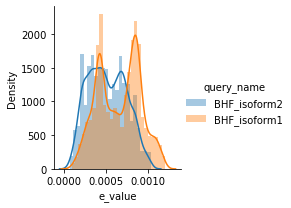

In [148]:
g = sns.FacetGrid(bhf_pfam_pfam2go, hue='query_name')
g.map(sns.distplot, 'e_value')
g.add_legend()

/Users/olgabot/opt/miniconda3/envs/botryllus/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/olgabot/opt/miniconda3/envs/botryllus/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


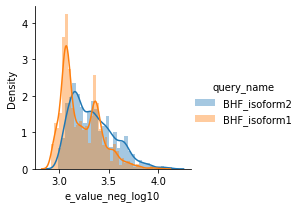

In [151]:
g = sns.FacetGrid(bhf_pfam_pfam2go, hue='query_name')
g.map(sns.distplot, 'e_value_neg_log10')
g.add_legend()

In [150]:
bhf_pfam_pfam2go_top_evalue = bhf_pfam_pfam2go.query('e_value < 5e12')
bhf_pfam_pfam2go_top_evalue.shape

(13651, 17)

In [127]:
bhf_pfam_pfam2go_top_evalue

,e_value,similarity,query_name,pfam_name,go_term,0,1,e_value_neg_log10,filename,go_id,md5,name,pfam_id,pfam_id_full,query_filename,query_kmers,query_md5
0,1.388177e+12,0.141192,BHF_isoform2,Chitin_bind_1,GO:chitin binding,A0A1Y2CQP8_9FUNG/32-76,A0A1Y2CQP8.1,-12.142445,NaN,GO:0008061,07b63a911e2013a459db28346afe7128,A0A1Y2CQP8_9FUNG/32-76 A0A1Y2CQP8.1 PF00187.22;Chitin_bind_1;,PF00187,PF00187.22,bhf_isoforms.fa,196,6ca89ced
334,1.473750e+12,0.132994,BHF_isoform2,Zn_clus,"GO:DNA-binding transcription factor activity, RNA polymerase II-specific",A0A1E3NGZ3_9ASCO/34-72,A0A1E3NGZ3.1,-12.168424,NaN,GO:0000981,334785b107fcc3222edc5998f3c804d6,A0A1E3NGZ3_9ASCO/34-72 A0A1E3NGZ3.1 PF00172.21;Zn_clus;,PF00172,PF00172.21,bhf_isoforms.fa,196,6ca89ced
335,1.473750e+12,0.132994,BHF_isoform2,Zn_clus,GO:zinc ion binding,A0A1E3NGZ3_9ASCO/34-72,A0A1E3NGZ3.1,-12.168424,NaN,GO:0008270,334785b107fcc3222edc5998f3c804d6,A0A1E3NGZ3_9ASCO/34-72 A0A1E3NGZ3.1 PF00172.21;Zn_clus;,PF00172,PF00172.21,bhf_isoforms.fa,196,6ca89ced
8,1.473750e+12,0.132994,BHF_isoform2,MarR,GO:DNA-binding transcription factor activity,A0A345ZYJ1_9RHIZ/52-108,A0A345ZYJ1.1,-12.168424,NaN,GO:0003700,6e631dd43fe1b7da1148ec591c8e5f01,A0A345ZYJ1_9RHIZ/52-108 A0A345ZYJ1.1 PF01047.25;MarR;,PF01047,PF01047.25,bhf_isoforms.fa,196,6ca89ced
336,1.473750e+12,0.132994,BHF_isoform2,Zn_clus,"GO:regulation of transcription, DNA-templated",A0A1E3NGZ3_9ASCO/34-72,A0A1E3NGZ3.1,-12.168424,NaN,GO:0006355,334785b107fcc3222edc5998f3c804d6,A0A1E3NGZ3_9ASCO/34-72 A0A1E3NGZ3.1 PF00172.21;Zn_clus;,PF00172,PF00172.21,bhf_isoforms.fa,196,6ca89ced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3089,4.995841e+12,0.045838,BHF_isoform1,ABC_membrane,GO:transmembrane transport,R5M4G6_9MOLU/220-498,R5M4G6.1,-12.698609,NaN,GO:0055085,3c77da8627da77a7f3c3471e45adc1f6,R5M4G6_9MOLU/220-498 R5M4G6.1 PF00664.26;ABC_membrane;,PF00664,PF00664.26,bhf_isoforms.fa,229,cffe047d
3088,4.995841e+12,0.045838,BHF_isoform1,ABC_membrane,GO:ATPase-coupled transmembrane transporter activity,R5M4G6_9MOLU/220-498,R5M4G6.1,-12.698609,NaN,GO:0042626,3c77da8627da77a7f3c3471e45adc1f6,R5M4G6_9MOLU/220-498 R5M4G6.1 PF00664.26;ABC_membrane;,PF00664,PF00664.26,bhf_isoforms.fa,229,cffe047d
2208,4.995841e+12,0.045838,BHF_isoform1,polyprenyl_synt,GO:isoprenoid biosynthetic process,A0A1Y2V9V1_9PEZI/35-300,A0A1Y2V9V1.1,-12.698609,NaN,GO:0008299,93ecc217f29964b466df7d332536c9a4,A0A1Y2V9V1_9PEZI/35-300 A0A1Y2V9V1.1 PF00348.20;polyprenyl_synt;,PF00348,PF00348.20,bhf_isoforms.fa,229,cffe047d
2206,4.995841e+12,0.045838,BHF_isoform1,polyprenyl_synt,GO:isoprenoid biosynthetic process,A0A369H3Z8_9HYPO/35-299,A0A369H3Z8.1,-12.698609,NaN,GO:0008299,b6d9a9acc4a2fb73fef0f82d0a45d8f9,A0A369H3Z8_9HYPO/35-299 A0A369H3Z8.1 PF00348.20;polyprenyl_synt;,PF00348,PF00348.20,bhf_isoforms.fa,229,cffe047d


## Isoform 1 specific domains

In [131]:
set(bhf_pfam_pfam2go_top_evalue.query('query_name == "BHF_isoform1"').pfam_name).difference(bhf_pfam_pfam2go_top_evalue.query('query_name == "BHF_isoform2"').pfam_name)

{'ABC_membrane',
 'AstE_AspA',
 'CM_2',
 'CheW',
 'FAD_binding_4',
 'Fer2',
 'PNP_UDP_1',
 'Pan_kinase',
 'Rubrerythrin',
 'S4',
 'Sybindin',
 'VHS',
 'fn3',
 'zf-B_box'}

## Isoform 2 specific domains

In [132]:
set(bhf_pfam_pfam2go_top_evalue.query('query_name == "BHF_isoform2"').pfam_name).difference(bhf_pfam_pfam2go_top_evalue.query('query_name == "BHF_isoform1"').pfam_name)

{'AAA_21',
 'ALS2CR8',
 'Acetyltransf_3',
 'Alpha-amylase',
 'Amidohydro_1',
 'Annexin',
 'CBM_14',
 'Capsule_synth',
 'CoaE',
 'Cytochrome_CBB3',
 'DEDD_Tnp_IS110',
 'DNA_ligase_A_N',
 'DOG1',
 'Dickkopf_N',
 'Dynactin_p62',
 'E2F_TDP',
 'EamA',
 'FR47',
 'Glyco_hydro_18',
 'GntR',
 'H-kinase_dim',
 'HTH_1',
 'HTH_IclR',
 'Histone',
 'Hpt',
 'LAG1-DNAbind',
 'LRR_8',
 'MAP7',
 'Mac',
 'Metallophos',
 'Methylase_S',
 'Methyltransf_2',
 'Mre11_DNA_bind',
 'MutS_II',
 'NUDIX',
 'OmpH',
 'PABP',
 'PBP_GOBP',
 'PDEase_I',
 'PDZ_2',
 'PIF1',
 'Peptidase_A25',
 'Peptidase_M2',
 'Peptidase_S8',
 'Phage_int_SAM_1',
 'Phage_int_SAM_3',
 'Phospholip_A2_2',
 'Polysacc_deac_1',
 'PspB',
 'RNA_pol_Rpb4',
 'RQC',
 'RRM_1',
 'RYDR_ITPR',
 'Ras',
 'Rep_fac-A_3',
 'RhoGEF',
 'RuvX',
 'SpoIIE',
 'UPF0552',
 'ZnuA',
 'adh_short',
 'p450',
 'tRNA-synt_1c',
 'zf-TRAF'}

## Shared domains

In [134]:
set(bhf_pfam_pfam2go_top_evalue.query('query_name == "BHF_isoform2"').pfam_name).intersection(bhf_pfam_pfam2go_top_evalue.query('query_name == "BHF_isoform1"').pfam_name)

{'ABC_tran',
 'ACOX',
 'Arg_tRNA_synt_N',
 'CBM_1',
 'COX17',
 'Cadherin',
 'Chitin_bind_1',
 'Creatinase_N',
 'Cystatin',
 'EGF_CA',
 'FGGY_N',
 'Flavin_Reduct',
 'GTP_EFTU_D2',
 'Glyco_hydro_2',
 'HLH',
 'HTH_18',
 'HemolysinCabind',
 'HisKA',
 'IMS_C',
 'Intu_longin_1',
 'KH_1',
 'KRE1',
 'Keratin_B2_2',
 'Kunitz_BPTI',
 'LacI',
 'Ldl_recept_a',
 'MATH',
 'MarR',
 'MarR_2',
 'MazE_antitoxin',
 'Molydop_binding',
 'NB-ARC',
 'NTP_transf_2',
 'PAS',
 'PAZ',
 'PRD',
 'PSK',
 'PUA',
 'Pkinase',
 'Protamine_like',
 'Pur_DNA_glyco',
 'QVR',
 'RF-1',
 'RNA_pol_Rpb2_7',
 'Ribosomal_L29e',
 'Ribosomal_L31',
 'SAP30_Sin3_bdg',
 'SLC12',
 'SRP54_N',
 'TFIIS_M',
 'TSP_3',
 'Terpene_synth_C',
 'Troponin',
 'TsaE',
 'WAP',
 'WD40',
 'WW',
 'Y2_Tnp',
 'ZZ',
 'Zn_clus',
 'bact-PGI_C',
 'polyprenyl_synt',
 'rve',
 'zf-C3HC4',
 'zf-C4'}

<AxesSubplot:xlabel='query_name', ylabel='count'>

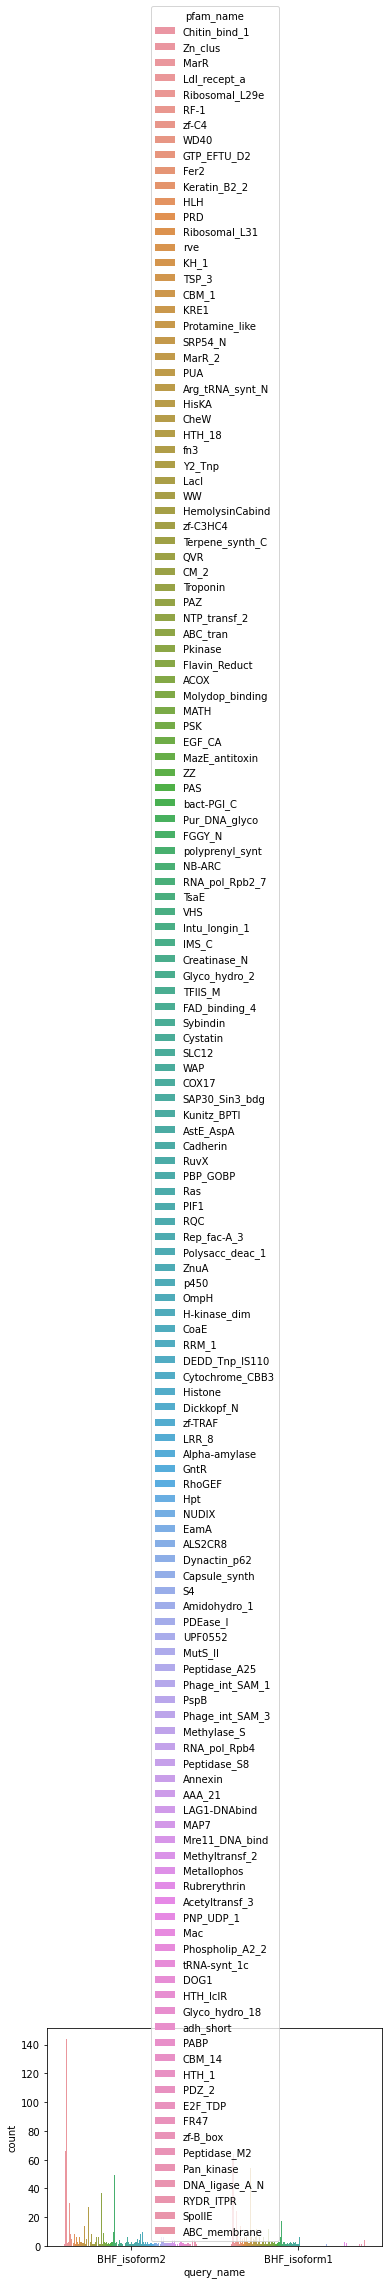

In [129]:
sns.countplot(x='query_name', hue='pfam_name', data=bhf_pfam_pfam2go_top_evalue)

<AxesSubplot:xlabel='query_name', ylabel='count'>

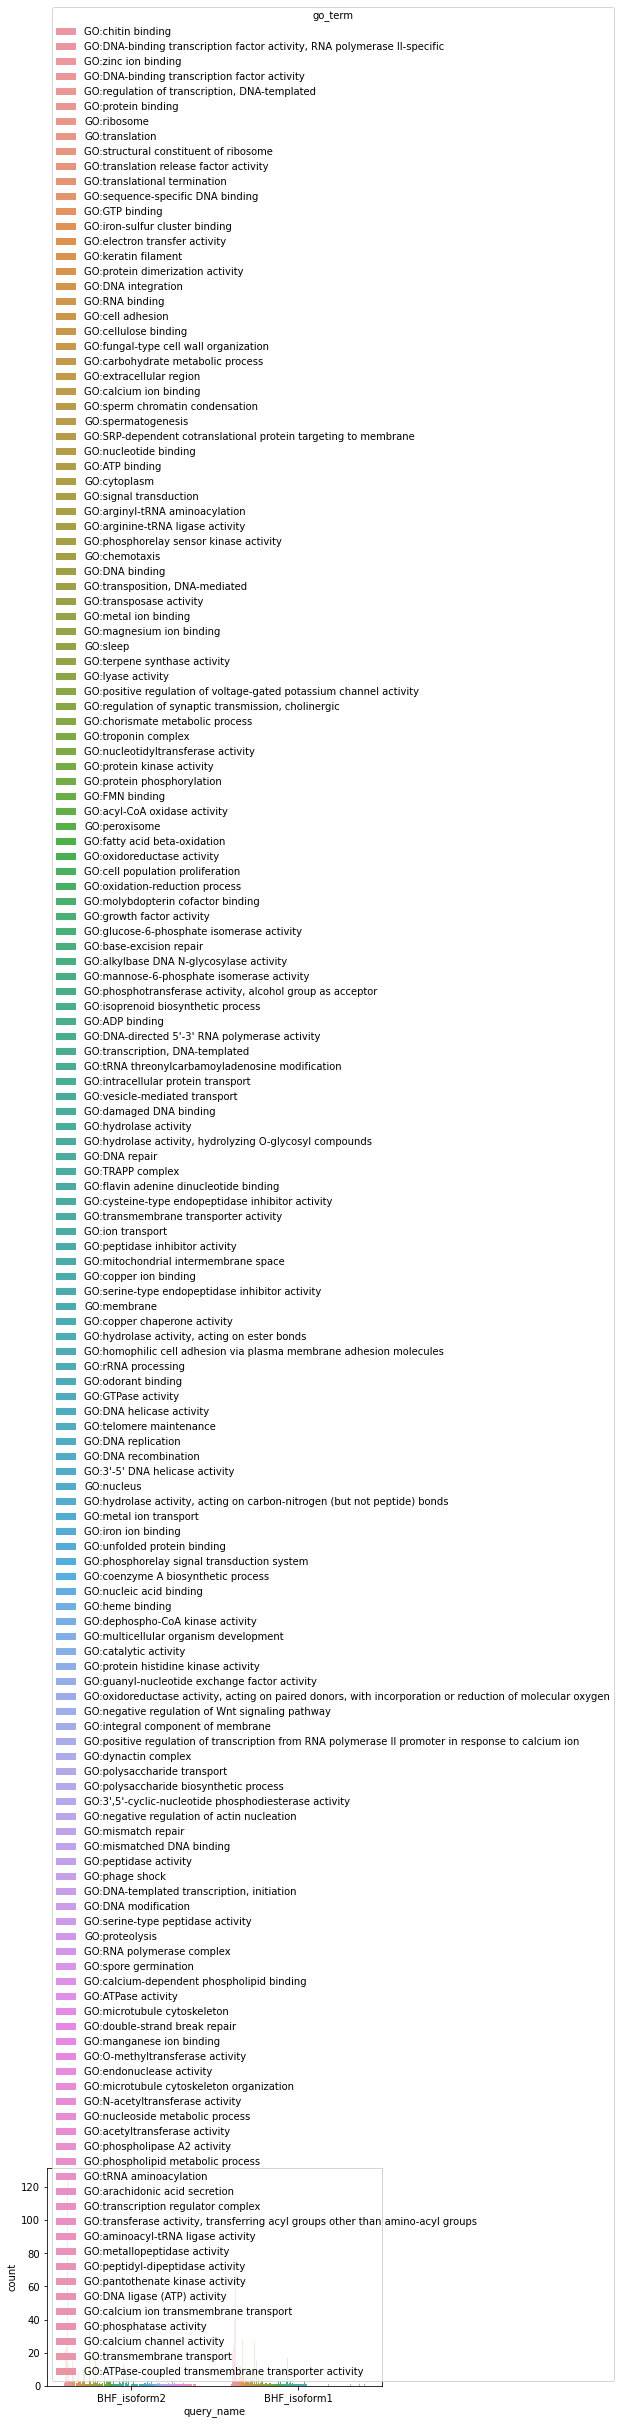

In [135]:
sns.countplot(x='query_name', hue='go_term', data=bhf_pfam_pfam2go_top_evalue)